# Opening image

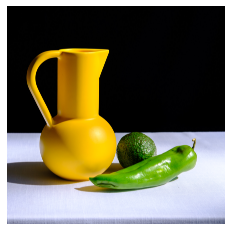

In [1]:
import cv2
from matplotlib import pyplot as plt

image = cv2.imread("../images/5.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image, cmap="gray", vmin=0, vmax=255)
#plt.imshow(image)
plt.axis("off")
plt.show()

# K-means clustering

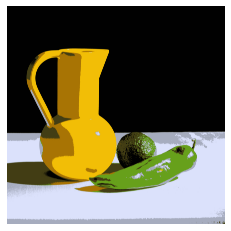

In [4]:
'''
Tutorial from: https://www.thepythoncode.com/article/kmeans-for-image-segmentation-opencv-python
'''

import numpy as np

# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))

# convert to float
pixel_values = np.float32(pixel_values)

# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 7
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)

# show the image
plt.imshow(segmented_image, cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.show()